# Recap on optimization and the consumer problem

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

## Optimization

Suppose we want to find the minimum of the following function:
 $$
 f(x) = \sin(x) + 0.05*x^2
 $$

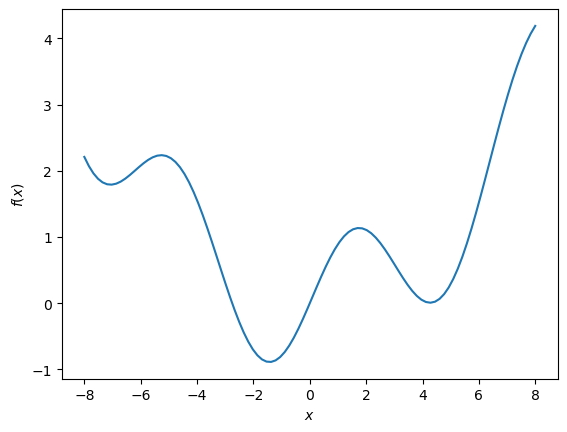

In [2]:
# Define function
def f(x):
    return np.sin(x) + 0.05*x**2

# Plot:
x_grid_plot = np.linspace(-8, 8, 100)
f_grid_plot = f(x_grid_plot)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_grid_plot,f_grid_plot)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$');

### Grid search

In [11]:
# Create grid of x
N_points = 100
x_grid = np.linspace(-8, 8, N_points)

# Loop through x and f to find x that minimizes f
x_best = np.nan
f_best = np.inf

for x in x_grid:
    if f(x) <= f_best:
        f_best = f(x)
        x_best = x

print(f'Minimizing x:{x_best:5.2f}')
print(f'Minimum: {f_best:5.2f}')

Minimizing x:-1.37
Minimum: -0.89


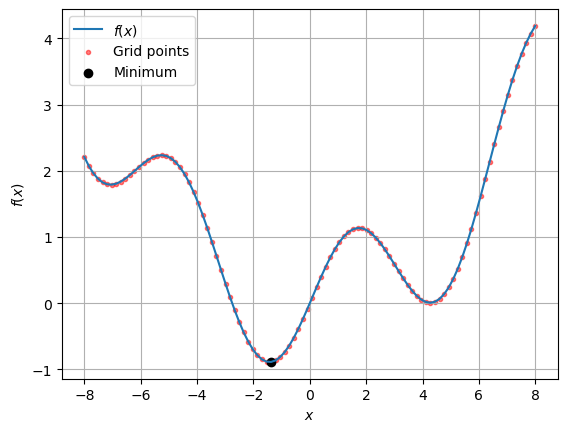

In [12]:
# Add to the plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_grid_plot,f_grid_plot, label='$f(x)$')

ax.scatter(x_grid, f(x_grid), color='red', marker='.', alpha=0.5, label='Grid points')
ax.scatter(x_best, f_best, color='black',label='Minimum')

ax.grid()
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$');

### Solver - an illustrative Newton optimizer

This very simple optimizer is a Newton optimizer, meaning that is updates guesses based on the gradient and hessianof the function in the point of evaluation. This one is purely illustrative and not particularly robust - use one of SciPy's optimizers for solving problem sets and projects.


In [16]:
# gradient of f
def f_grad(x):
    return np.cos(x) + 0.1*x

# hessian of f
def f_hess(x):
    return -np.sin(x) + 0.1

# this function computes the next step given a function and x
def newton_step(f, grad, hess, x0):
    x_next = x0 - grad(x0)/hess(x0)
    return x_next

# setup
x0 = -3 # -2.5 for global minimum # 5 for local min # -3 for maximum
x_list = np.array([])
delta = np.inf
tol = 1e-6
maxiter = 1000
i = 0

# Take steps until convergence
while delta>tol and i<maxiter:
    x1 = newton_step(f, f_grad, f_hess, x0) # compute next step
    delta = np.abs(x1-x0) # check convergence
    x_list = np.append(x_list,x0) # append to list
    x0 = x1 # update x

    i += 1

if i < maxiter:
    print('Converged!')
    print(f'Minimizing x: {x0:5.2f}')
    print(f'Minimum: {f(x0):5.2}')
else:
    print('Did not converge')

Converged!
Minimizing x:  1.75
Minimum:   1.1


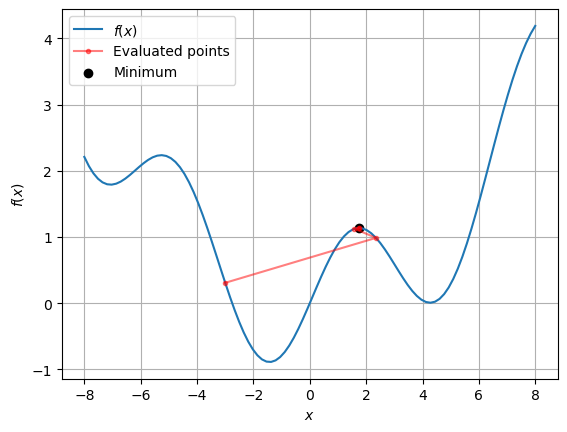

In [17]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_grid_plot,f_grid_plot, label='$f(x)$')

ax.plot(x_list, f(x_list), color='red', marker='.', alpha=0.5, label='Evaluated points')
ax.scatter(x0, f(x0), color='black',label='Minimum')

ax.grid()
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$');

This can (and probably should) be done using a SciPy solver:

In [18]:
# You can use minimize_scalar when optimizing over just one dimension
res_scalar = optimize.minimize_scalar(fun=f)
res_scalar

     fun: -0.8878628265737075
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 14
     nit: 9
 success: True
       x: -1.4275517796760682

In [21]:
# Otherwise, use minimize. here you have to provide at least a starting value x0
res = optimize.minimize(fun=f, x0=-3)
res

      fun: -0.8878628265737039
 hess_inv: array([[0.91797144]])
      jac: array([8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.4275517])

## Optimization in higher dimensions

The methods are also applicable in higher dimensions. Try with this function:
$$
g(x,y) = (1-x)^2 + 100*(y-x^2)^2
$$

In [22]:
def g(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

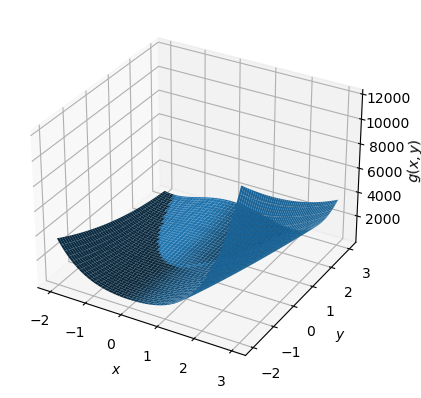

In [23]:
x_grid_plot = np.linspace(-2, 3, 100)
y_grid_plot = np.linspace(-2, 3, 100)
x_mesh, y_mesh = np.meshgrid(x_grid_plot, y_grid_plot)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x_mesh, y_mesh, g(x_mesh, y_mesh))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x,y)$');

### Grid search

In [24]:
N_points = 25

x_grid = np.linspace(-2,3,N_points)
y_grid = np.linspace(-2,3,N_points)

g_best = np.inf
x_best = np.nan
y_best = np.nan

for x in x_grid:
    for y in y_grid:
        if g(x,y) < g_best:
            g_best = g(x,y)
            x_best = x
            y_best = y

print(f'Minimizing (x,y): ({x_best:3.2f}, {y_best:3.2f})')
print(f'Minimum: {g(x_best, y_best):3.2f}')

Minimizing (x,y): (0.71, 0.50)
Minimum: 0.09


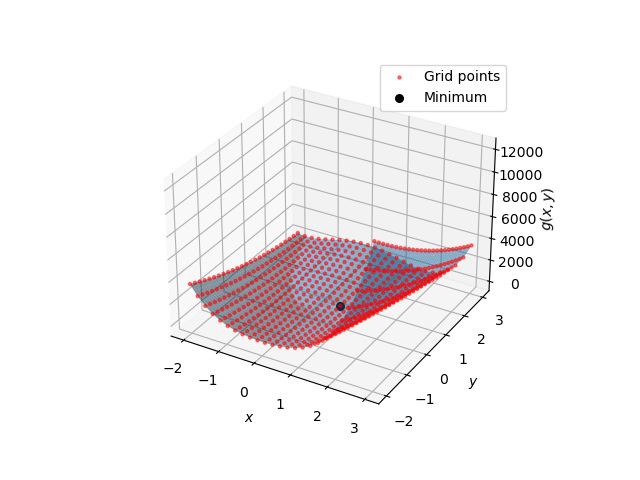

In [25]:
%matplotlib widget
x_gs_mesh, y_gs_mesh = np.meshgrid(x_grid, y_grid)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x_mesh, y_mesh, g(x_mesh, y_mesh),alpha = 0.5)

ax.scatter(x_gs_mesh, y_gs_mesh, g(x_gs_mesh,y_gs_mesh), marker='.', color='red', alpha=0.5, label='Grid points')
ax.scatter(x_best, y_best, g(x_best,y_best), marker='o', s=30, color='black', label='Minimum')

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x,y)$');

### Solver

In [26]:
# define objective function:
obj = lambda x: g(x[0], x[1])

res = optimize.minimize(fun=obj, x0=(x_best, y_best)) # guess on minimum in grid search
res

      fun: 2.0777668327632356e-11
 hess_inv: array([[0.48545962, 0.96995201],
       [0.96995201, 1.94290047]])
      jac: array([ 1.95984326e-06, -1.05863240e-06])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 13
     njev: 18
   status: 0
  success: True
        x: array([0.99999544, 0.99999087])

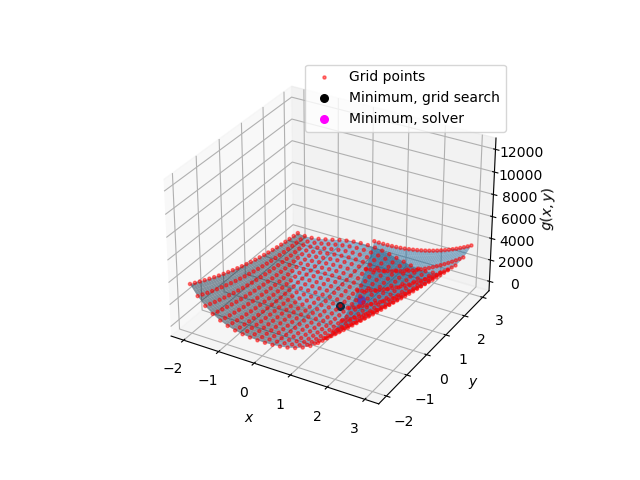

In [27]:
%matplotlib widget
x_gs_mesh, y_gs_mesh = np.meshgrid(x_grid, y_grid)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x_mesh, y_mesh, g(x_mesh, y_mesh),alpha = 0.5)

ax.scatter(x_gs_mesh, y_gs_mesh, g(x_gs_mesh,y_gs_mesh), marker='.', color='red', alpha=0.5, label='Grid points')
ax.scatter(x_best, y_best, g(x_best,y_best), marker='o', s=30, color='black', label='Minimum, grid search')

ax.scatter(res.x[0], res.x[1], res.fun, marker='o', s=30, color='magenta', label='Minimum, solver')

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x,y)$');

## Solving a consumer problem

Consider a simple consumer problem:

$$
\max_{c, \ell} \frac{c^{1-\sigma}}{1-\sigma} - \frac{\ell^{1+\nu}}{1+\nu} \\
\text st. \quad c \leq w\ell
$$

In words: choose consumption $c$ and labor supply $\ell$ subject to budget constraint.
There are several ways to solve this problem.

In [28]:
# set parameters
from types import SimpleNamespace
par = SimpleNamespace()
par.sigma = 2
par.nu = 0.4
par.w = 1.5

1: As a constrained optimization problem in two dimensions

In [29]:
# define utility function
def utility(c, l, par):
    return (c**(1-par.sigma))/(1-par.sigma) - (l**(1+par.nu)/(1+par.nu))

# define budget constraint function
def budgetcons(c, l, par):
    return par.w*l-c # this is negative when violated

# define objective function, constraint and initial guess
obj = lambda x: -utility(x[0], x[1], par)
const = ({'type':'ineq','fun':lambda x: budgetcons(x[0],x[1],par)})
x0 = np.array([1,1])

# optimize!
res = optimize.minimize(fun=obj,x0=x0,constraints=const,method='SLSQP')
res

     fun: 1.3532041587961001
     jac: array([-0.62279272,  0.93474853])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.26715059, 0.84476706])

2: As an unconstrained optimization problem, using the budget constraint

In [30]:
# if the budget constraint binds, we know l from c
def utility_unc(c, par):
    l = c/par.w
    return (c**(1-par.sigma))/(1-par.sigma) - (l**(1+par.nu)/(1+par.nu))


# define objective function
obj = lambda c: -utility_unc(c, par)

#  optimize!
res = optimize.minimize(obj, x0=1)
res

      fun: 1.3532040998621457
 hess_inv: array([[0.84071752]])
      jac: array([3.35276127e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([1.2668374])

3: As an unconstrained optimization problem using a penalty

In [31]:
def objective(c,l, par):
    utility = (c**(1-par.sigma))/(1-par.sigma) - (l**(1+par.nu)/(1+par.nu))

    # add penalty if budget constraint is violated
    penalty = 0
    if c > par.w*l:
        penalty += 1000*(c-par.w*l)

    return - (utility-penalty)

# define objective function
obj = lambda x: objective(x[0], x[1], par)
x0 = np.array([1,1])

# Optimize!
res = optimize.minimize(fun=obj, x0=x0, method='nelder-mead')
res

 final_simplex: (array([[1.26678521, 0.84452347],
       [1.26687478, 0.8445832 ],
       [1.26671649, 0.84447767]]), array([1.3532041 , 1.35320411, 1.35320411]))
           fun: 1.35320410201299
       message: 'Optimization terminated successfully.'
          nfev: 133
           nit: 70
        status: 0
       success: True
             x: array([1.26678521, 0.84452347])